# Simulate data
This notebook generates simulated experiments by sampling from the VAE using the user selected template experiment as a guide for sampling

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import glob
import pandas as pd
import numpy as np
import random
import seaborn as sns
import umap
from keras.models import load_model
from sklearn.decomposition import PCA
import pickle

from plotnine import (ggplot,
                      labs,  
                      geom_line, 
                      geom_point,
                      geom_errorbar,
                      aes, 
                      ggsave, 
                      theme_bw,
                      theme,
                      xlim,
                      ylim,
                      facet_wrap,
                      scale_color_manual,
                      guides, 
                      guide_legend,
                      element_blank,
                      element_text,
                      element_rect,
                      element_line,
                      coords)

sys.path.append("../")
from functions import utils, generate_labeled_data

from numpy.random import seed
randomState = 123
seed(randomState)

/home/alexandra/anaconda3/envs/ranked_pathways/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.


In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../"))

config_file = os.path.abspath(os.path.join(base_dir,
                                           "Rank_pathways",
                                           "init_config.tsv"))
params = utils.read_config(config_file)

In [3]:
# Load params
local_dir = params["local_dir"]
dataset_name = params['dataset_name']
NN_architecture = params['NN_architecture']
num_runs = params['num_simulated']
project_id = params['project_id']

NN_dir = os.path.join(
    base_dir, 
    dataset_name, 
    "models", 
    NN_architecture)

In [4]:
# Load real compendium
compendium_file = os.path.join(
    local_dir,
    "recount2_compedium_data.tsv")

normalized_compendium_file = os.path.join(
    local_dir,
    "normalized_recount2_compendium_data.tsv")

# Load real template experiment
template_data_file = os.path.join(
    local_dir,
    "recount2_template_data.tsv")

# Load pickled files
scaler_transform_file = os.path.join(
    local_dir,
    "scaler_transform.pickle")

scaler = pickle.load(open(scaler_transform_file, "rb" ) )

In [5]:
# Read data
compendium = pd.read_csv(
    compendium_file,
    header=0,
    sep='\t',
    index_col=0)

normalized_compendium = pd.read_csv(
    normalized_compendium_file,
    header=0,
    sep='\t',
    index_col=0)

template_data = pd.read_csv(
    template_data_file,
    header=0,
    sep='\t',
    index_col=0)

### Simulate experiments using selected template experiment

In [6]:
# Simulate experiments
# Make sure range is correct
# Generate multiple simulated datasets
#for i in range(num_runs):
#    generate_labeled_data.shift_template_experiment(
#        normalized_compendium_file,
#        project_id,
#        NN_architecture,
#        dataset_name,
#        scaler,
#        local_dir,
#        base_dir,
#        i)

In [7]:
# Truncate simulated experiments
smRNA_samples = ["SRR493961",
                 "SRR493962",
                 "SRR493963",
                 "SRR493964",
                 "SRR493965",
                 "SRR493966",
                 "SRR493967",
                 "SRR493968",
                 "SRR493969",
                 "SRR493970",
                 "SRR493971",
                 "SRR493972"]

for i in range(num_runs):
    simulated_data_file = os.path.join(
        local_dir, 
        "pseudo_experiment",
        "selected_simulated_data_"+project_id+"_"+str(i)+".txt")
    
    utils.subsample_data(simulated_data_file,
                        smRNA_samples)

### Quick validation of simulated experiments

**Spot check expression values**
1. Values are different between different simulated data files (meaning it was a different simulated dataset), and different from the template experiment
2. Range of values is scaled the same as the compendium

In [8]:
# Compendium
print(compendium.shape)
compendium.head()

(1552, 58037)


,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000283690.1,ENSG00000283691.1,ENSG00000283692.1,ENSG00000283693.1,ENSG00000283694.1,ENSG00000283695.1,ENSG00000283696.1,ENSG00000283697.1,ENSG00000283698.1,ENSG00000283699.1
SRR1604987,35.467314,0.027332,32.157194,2.358523,2.588223,0.000000,5.738176,43.607106,6.178332,11.840453,...,0.000000,0.164063,0.0,0.0,0.000000,0.104461,0.108411,0.973816,0.001023,0.0
SRR1604988,36.738594,0.014175,31.768894,2.441588,2.879852,0.028577,5.801958,44.476582,5.770250,11.408501,...,0.005034,0.637123,0.0,0.0,0.000000,0.000000,0.126587,0.862680,0.000364,0.0
SRR1604989,23.421167,0.000000,26.339462,2.416182,2.935066,0.000000,4.173785,33.963581,8.310376,11.857877,...,0.000000,0.376129,0.0,0.0,0.000000,0.087597,0.338459,0.633735,0.034451,0.0
SRR1604990,22.413470,0.000000,26.680954,2.747019,3.281573,0.009275,4.233309,33.615684,8.207437,12.296103,...,0.000000,0.112437,0.0,0.0,0.165182,0.000000,0.252239,1.049893,0.004970,0.0
SRR1604991,22.274276,0.000000,28.510716,1.818116,2.095023,0.011248,3.693352,32.073188,4.571614,11.777791,...,0.000000,0.107868,0.0,0.0,0.000000,0.000000,0.179313,0.952988,0.111618,0.0


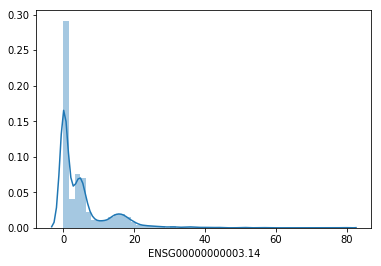

In [9]:
sns.distplot(compendium['ENSG00000000003.14'])

In [10]:
# Template experiment
print(template_data.shape)
template_data.head()

(24, 58037)


,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000283690.1,ENSG00000283691.1,ENSG00000283692.1,ENSG00000283693.1,ENSG00000283694.1,ENSG00000283695.1,ENSG00000283696.1,ENSG00000283697.1,ENSG00000283698.1,ENSG00000283699.1
SRR493937,3.80015,0.01819,9.12846,1.58580,0.71395,84.99054,19.94300,12.06559,2.49882,7.71300,...,0.00000,0.76952,0.0,0.0,0.00000,0.00000,0.62385,0.58851,0.0,0.00000
SRR493938,3.79847,0.00000,9.15767,1.45602,0.73897,85.78832,19.62125,11.73886,2.43531,7.12581,...,0.00000,0.56876,0.0,0.0,0.00000,0.00000,0.85951,0.45251,0.0,0.00000
SRR493939,20.22213,0.00000,15.52207,3.94492,2.51226,8.07295,47.24608,18.86696,2.44323,12.14367,...,0.00000,0.48316,0.0,0.0,0.00000,0.43290,0.49771,0.44683,0.0,0.00000
SRR493940,19.98833,0.00000,17.14030,3.97722,2.37885,7.59923,46.59446,18.92119,2.44828,12.04896,...,0.07756,0.63298,0.0,0.0,0.00000,0.22931,0.43171,0.46229,0.0,0.16816
SRR493941,3.23923,0.01940,9.06932,2.18158,1.00815,17.67589,19.37114,11.75976,1.97073,6.74071,...,0.00000,0.38162,0.0,0.0,0.07096,0.00000,0.60038,0.73940,0.0,0.00000


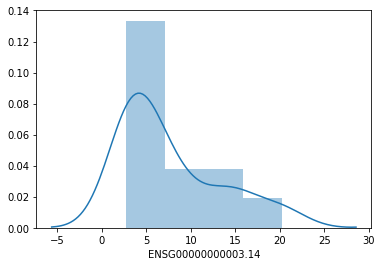

In [11]:
sns.distplot(template_data['ENSG00000000003.14'])

In [12]:
# Manual select one simulated experiment
simulated_file_1 = os.path.join(
    local_dir,
    "pseudo_experiment",
    "selected_simulated_data_"+project_id+"_0.txt")

# Read data
simulated_test_1 = pd.read_csv(
    simulated_file_1,
    header=0,
    sep='\t',
    index_col=0)

print(simulated_test_1.shape)
simulated_test_1.head()

(24, 58037)


,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000283690.1,ENSG00000283691.1,ENSG00000283692.1,ENSG00000283693.1,ENSG00000283694.1,ENSG00000283695.1,ENSG00000283696.1,ENSG00000283697.1,ENSG00000283698.1,ENSG00000283699.1
SRR493937,4.790,0.231,22.448,3.579,2.691,29.424,7.158,14.674,3.150,7.702,...,0.023,0.483,0.017,0.112,0.023,0.049,2.866,0.559,0.063,0.063
SRR493938,4.764,0.230,22.365,3.576,2.683,29.535,7.171,14.635,3.142,7.699,...,0.022,0.480,0.017,0.112,0.023,0.049,2.828,0.558,0.063,0.063
SRR493939,8.669,0.293,33.800,3.955,3.876,15.870,5.798,19.762,4.501,8.691,...,0.047,0.565,0.033,0.150,0.034,0.052,3.242,0.638,0.099,0.051
SRR493940,8.672,0.293,33.801,3.955,3.874,15.819,5.803,19.758,4.501,8.687,...,0.047,0.563,0.032,0.149,0.034,0.052,3.220,0.637,0.098,0.050
SRR493941,5.652,0.290,19.920,3.251,2.376,22.375,8.785,15.349,2.685,7.327,...,0.023,0.651,0.019,0.109,0.028,0.064,2.784,0.587,0.062,0.063


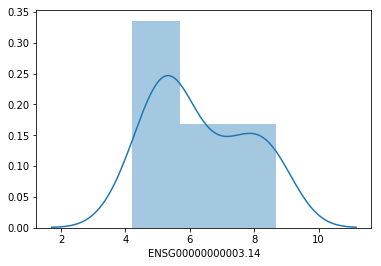

In [13]:
sns.distplot(simulated_test_1['ENSG00000000003.14'])

In [14]:
# Manual select another simulated experiment
simulated_file_2 = os.path.join(
    local_dir,
    "pseudo_experiment",
    "selected_simulated_data_"+project_id+"_10.txt")

# Read data
simulated_test_2 = pd.read_csv(
    simulated_file_2,
    header=0,
    sep='\t',
    index_col=0)

print(simulated_test_2.shape)
simulated_test_2.head()

(24, 58037)


,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000283690.1,ENSG00000283691.1,ENSG00000283692.1,ENSG00000283693.1,ENSG00000283694.1,ENSG00000283695.1,ENSG00000283696.1,ENSG00000283697.1,ENSG00000283698.1,ENSG00000283699.1
SRR493937,2.052,0.036,22.508,3.678,2.835,52.885,3.430,10.364,4.682,8.375,...,0.020,0.237,0.005,0.110,0.037,0.026,2.026,0.571,0.057,0.060
SRR493938,2.034,0.035,22.428,3.673,2.828,53.172,3.444,10.354,4.680,8.385,...,0.020,0.236,0.005,0.109,0.036,0.026,1.999,0.570,0.057,0.060
SRR493939,3.602,0.026,41.200,5.068,4.878,26.234,2.329,11.434,6.562,9.749,...,0.035,0.263,0.009,0.184,0.078,0.020,1.894,0.643,0.093,0.038
SRR493940,3.611,0.027,41.252,5.077,4.886,26.311,2.367,11.461,6.597,9.749,...,0.035,0.263,0.009,0.183,0.078,0.020,1.916,0.641,0.093,0.038
SRR493941,3.849,0.100,21.888,3.498,2.896,49.510,5.269,11.256,3.553,7.750,...,0.040,0.570,0.010,0.160,0.060,0.041,4.555,0.644,0.064,0.089


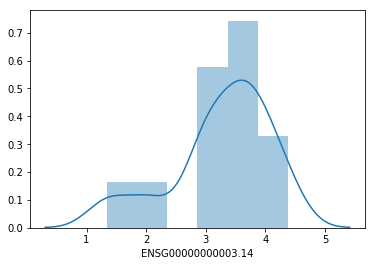

In [15]:
sns.distplot(simulated_test_2['ENSG00000000003.14'])

**Check clustering of simulated samples**

Check UMAP of original experiment and simulated experiments. Expect to see a similar structure in the template and simulated experiments. Also expect to see that the simulated experiment follows the distribution of the compendium.

**Visualization in latent space**

In [16]:
# Load VAE models
model_encoder_file = glob.glob(os.path.join(
        NN_dir,
        "*_encoder_model.h5"))[0]

weights_encoder_file = glob.glob(os.path.join(
    NN_dir,
    "*_encoder_weights.h5"))[0]

model_decoder_file = glob.glob(os.path.join(
    NN_dir,
    "*_decoder_model.h5"))[0]

weights_decoder_file = glob.glob(os.path.join(
    NN_dir,
    "*_decoder_weights.h5"))[0]

# Load saved models
loaded_model = load_model(model_encoder_file)
loaded_decode_model = load_model(model_decoder_file)

loaded_model.load_weights(weights_encoder_file)
loaded_decode_model.load_weights(weights_decoder_file)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
pca = PCA(n_components=2)

In [18]:
# Embedding of real compendium (encoded)

# Scale compendium
compendium_scaled = scaler.transform(compendium)
compendium_scaled_df = pd.DataFrame(compendium_scaled,
                                    columns=compendium.columns,
                                    index=compendium.index)

# Encode compendium into latent space
compendium_encoded = loaded_model.predict_on_batch(compendium_scaled_df)

compendium_encoded_df = pd.DataFrame(data=compendium_encoded, 
                                     index=compendium.index)

# Get and save model
#model = umap.UMAP(random_state=randomState).fit(compendium_encoded_df)
model = pca.fit(compendium_encoded_df)

compendium_UMAPencoded = model.transform(compendium_encoded_df)

compendium_UMAPencoded_df = pd.DataFrame(data=compendium_UMAPencoded,
                                         index=compendium_encoded_df.index,
                                         columns=['1','2'])

# Add label
compendium_UMAPencoded_df['experiment_id'] = 'background'

In [19]:
# Embedding of real template experiment (encoded)

# Scale template data
template_data_scaled = scaler.transform(template_data)
template_data_scaled_df = pd.DataFrame(template_data_scaled,
                                    columns=template_data.columns,
                                    index=template_data.index)

# Encode template experiment into latent space
template_encoded = loaded_model.predict_on_batch(template_data_scaled)
template_encoded_df = pd.DataFrame(data=template_encoded,
                                   index=template_data.index)

template_UMAPencoded = model.transform(template_encoded_df)

template_UMAPencoded_df = pd.DataFrame(data=template_UMAPencoded,
                                         index=template_encoded_df.index,
                                         columns=['1','2'])

# Add back label column
template_UMAPencoded_df['experiment_id'] = 'template_experiment'

In [20]:
# Embedding of simulated experiment (encoded)

# Scale simulated data
simulated_test_2_scaled = scaler.transform(simulated_test_2)
simulated_test_2_scaled_df = pd.DataFrame(simulated_test_2_scaled,
                                          columns=simulated_test_2.columns,
                                          index=simulated_test_2.index)

# Encode simulated experiment into latent space
simulated_encoded = loaded_model.predict_on_batch(simulated_test_2_scaled)
simulated_encoded_df = pd.DataFrame(
    simulated_encoded, index=simulated_test_2.index)

simulated_UMAPencoded = model.transform(simulated_encoded_df)

simulated_UMAPencoded_df = pd.DataFrame(data=simulated_UMAPencoded,
                                         index=simulated_encoded_df.index,
                                         columns=['1','2'])

# Add back label column
simulated_UMAPencoded_df['experiment_id'] = 'simulated_experiment'

In [21]:
# Concatenate dataframes
combined_UMAPencoded_df = pd.concat([compendium_UMAPencoded_df, 
                                    template_UMAPencoded_df,
                                    simulated_UMAPencoded_df])

combined_UMAPencoded_df.shape

(1600, 3)

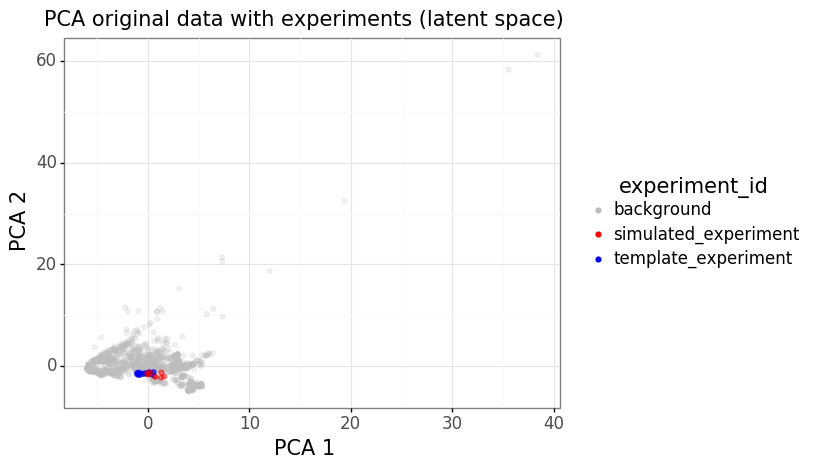

<ggplot: (8793350813669)>


In [22]:
# Plot
fig = ggplot(combined_UMAPencoded_df, aes(x='1', y='2'))
fig += geom_point(aes(color='experiment_id'), alpha=0.2)
fig += labs(x ='PCA 1',
            y = 'PCA 2',
            title = 'PCA original data with experiments (latent space)')
fig += theme_bw()
fig += theme(
    legend_title_align = "center",
    plot_background=element_rect(fill='white'),
    legend_key=element_rect(fill='white', colour='white'), 
    legend_title=element_text(family='sans-serif', size=15),
    legend_text=element_text(family='sans-serif', size=12),
    plot_title=element_text(family='sans-serif', size=15),
    axis_text=element_text(family='sans-serif', size=12),
    axis_title=element_text(family='sans-serif', size=15)
    )
fig += guides(colour=guide_legend(override_aes={'alpha': 1}))
fig += scale_color_manual(['#bdbdbd', 'red', 'blue'])
fig += geom_point(data=combined_UMAPencoded_df[combined_UMAPencoded_df['experiment_id'] == 'template_experiment'],
                  alpha=0.2, 
                  color='blue')
fig += geom_point(data=combined_UMAPencoded_df[combined_UMAPencoded_df['experiment_id'] == 'simulated_experiment'],
                  alpha=0.1, 
                  color='red')

print(fig)

**Visualization in gene space**

In [23]:
# Embedding of real compendium

# Get and save model
model = umap.UMAP(random_state=randomState).fit(compendium_scaled_df)

compendium_UMAPencoded = model.transform(compendium_scaled_df)

compendium_UMAPencoded_df = pd.DataFrame(data=compendium_UMAPencoded,
                                         index=compendium_scaled_df.index,
                                         columns=['1','2'])
# Add label
compendium_UMAPencoded_df['experiment_id'] = 'background'

In [24]:
# Embedding of real template experiment

template_UMAPencoded = model.transform(template_data_scaled_df)

template_UMAPencoded_df = pd.DataFrame(data=template_UMAPencoded,
                                         index=template_data_scaled_df.index,
                                         columns=['1','2'])

# Add back label column
template_UMAPencoded_df['experiment_id'] = 'template_experiment'

In [25]:
# Embedding of simulated template experiment

simulated_UMAPencoded = model.transform(simulated_test_2_scaled_df)

simulated_UMAPencoded_df = pd.DataFrame(data=simulated_UMAPencoded,
                                         index=simulated_test_2_scaled_df.index,
                                         columns=['1','2'])

# Add back label column
simulated_UMAPencoded_df['experiment_id'] = 'simulated_experiment'

In [26]:
# Concatenate dataframes
combined_UMAPencoded_df = pd.concat([compendium_UMAPencoded_df, 
                                    template_UMAPencoded_df,
                                    simulated_UMAPencoded_df])

combined_UMAPencoded_df.shape

(1600, 3)

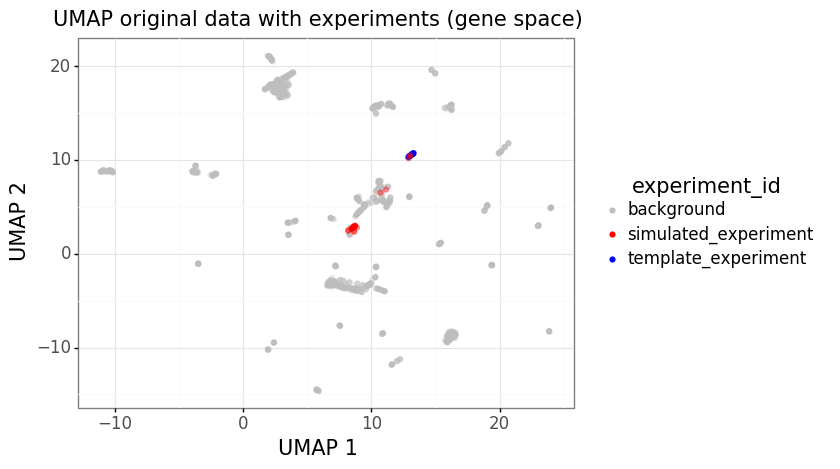

<ggplot: (8793347926481)>


In [27]:
# Plot
fig = ggplot(combined_UMAPencoded_df, aes(x='1', y='2'))
fig += geom_point(aes(color='experiment_id'), alpha=0.2)
fig += labs(x ='UMAP 1',
            y = 'UMAP 2',
            title = 'UMAP original data with experiments (gene space)')
fig += theme_bw()
fig += theme(
    legend_title_align = "center",
    plot_background=element_rect(fill='white'),
    legend_key=element_rect(fill='white', colour='white'), 
    legend_title=element_text(family='sans-serif', size=15),
    legend_text=element_text(family='sans-serif', size=12),
    plot_title=element_text(family='sans-serif', size=15),
    axis_text=element_text(family='sans-serif', size=12),
    axis_title=element_text(family='sans-serif', size=15)
    )
fig += guides(colour=guide_legend(override_aes={'alpha': 1}))
fig += scale_color_manual(['#bdbdbd', 'red', 'blue'])
fig += geom_point(data=combined_UMAPencoded_df[combined_UMAPencoded_df['experiment_id'] == 'template_experiment'],
                  alpha=0.2, 
                  color='blue')
fig += geom_point(data=combined_UMAPencoded_df[combined_UMAPencoded_df['experiment_id'] == 'simulated_experiment'],
                  alpha=0.2, 
                  color='red')

print(fig)